# Chapter 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Perceptron with `scikit-learn`

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
#データをテスト用とトレーニング用に分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [6]:
#トレーニングセットとテストセットに含まれているクラスラベルの比率が入力セットと同じ
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train', np.bincount(y_train))
print('Labels counts in y_test', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train [35 35 35]
Labels counts in y_test [15 15 15]


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
#特徴量の標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
#sklearnにあるパーセプトロンクラスを使う
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [10]:
#モデルへの適合
ppn = Perceptron(max_iter=40, eta0=0.01, random_state=1)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)

In [11]:
#誤分類したサンプルの数
print('Misclassified samples: %d' % (y_test != y_pred).sum())
#正解率
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
#正解率（scoreメソッド）
print('Accuracy: %.2f' % ppn.score(X_test_std, y_test))

Misclassified samples: 3
Accuracy: 0.93
Accuracy: 0.93


In [12]:
from matplotlib.colors import ListedColormap

#plot function
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    
    #create grid points
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    #make a prediction
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    
    plt.xlim = (xx1.min(), xx1.max())
    plt.ylim = (xx2.min(), xx2.max())
    
    #plotting
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')
    
    #テストサンプルに丸をつける
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], alpha=1.0, c='', marker='o', label='test set', edgecolor='black', linewidth=1, s=100)

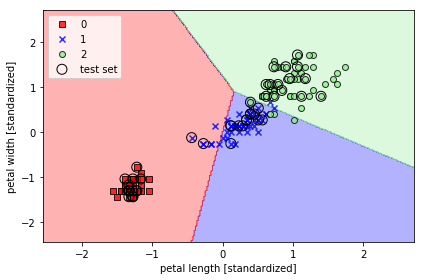

In [13]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Logistic Regression

In [14]:
#シグモイド関数
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

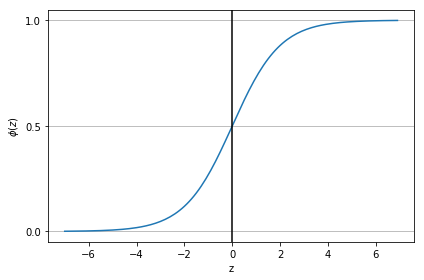

In [15]:
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim = (-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

In [16]:
#コスト関数
def cost_1(z):
    return - np.log(sigmoid(z))
def cost_0(z):
    return - np.log(1 - sigmoid(z))

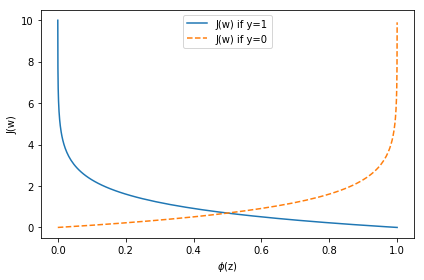

In [17]:
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
plt.ylim=(0.0, 5.1)
plt.xlim=(0,1)
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='upper center')
plt.tight_layout()
plt.show()

In [18]:
from logistic import LogisticRegressionGD

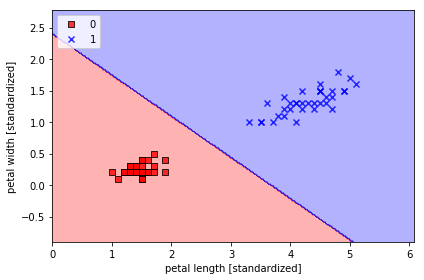

In [19]:
X_train_01_subset = X_train[(y_train==0)|(y_train==1)]
y_train_01_subset = y_train[(y_train==0)|(y_train==1)]
lrgd = LogisticRegressionGD(eta=0.05, n_iter=100, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Logistic Regression with `scikit-learn`

In [20]:
from sklearn.linear_model import LogisticRegression

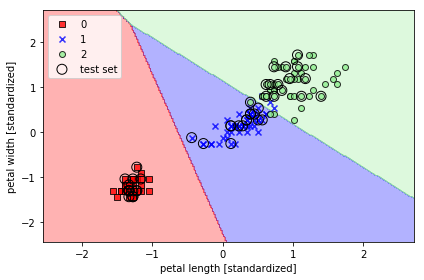

In [21]:
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [22]:
#最初の３つのサンプルがそれぞれのクラスに入る確率
lr.predict_proba(X_test_std[:3, :])

array([[3.20136878e-08, 1.46953648e-01, 8.53046320e-01],
       [8.34428069e-01, 1.65571931e-01, 4.57896429e-12],
       [8.49182775e-01, 1.50817225e-01, 4.65678779e-13]])

In [23]:
#最初の３つのサンプルはどれに分類されるか
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

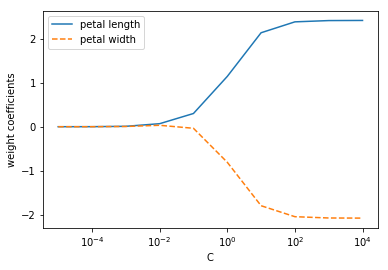

In [24]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:,0], label='petal length')
plt.plot(params, weights[:,1], linestyle='--', label='petal width')
plt.ylabel('weight coefficients')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

## Support Vector Machine (SVM)

In [25]:
from sklearn.svm import SVC

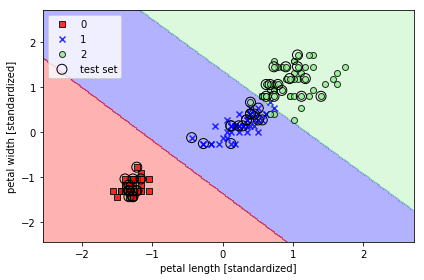

In [26]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## kernel SVM

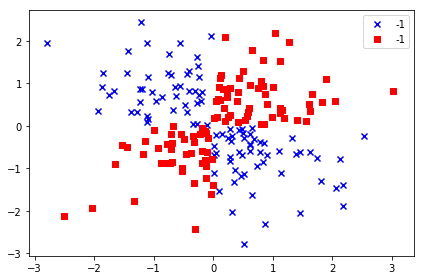

In [27]:
np.random.seed(1)
#標準正規分布に従う乱数で200行2列の行列を作成
X_xor = np.random.randn(200, 2)
#排他的論理和
y_xor = np.logical_xor(X_xor[:,0] > 0, X_xor[:,1] > 0)
#True->1, False->-1
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor==1,0], X_xor[y_xor==1,1], c='b', marker='x', label='-1')
plt.scatter(X_xor[y_xor==-1,0], X_xor[y_xor==-1,1], c='r', marker='s', label='-1')
plt.xlim=(-3, 3)
plt.ylim=(-3, 3)
plt.legend(loc='best')
plt.tight_layout()
plt.show()
#線形分離不可能

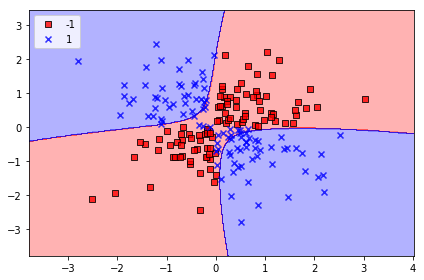

In [28]:
#動径基底関数カーネル(Radial Basis Function Kernel, RBF)を使って分離
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

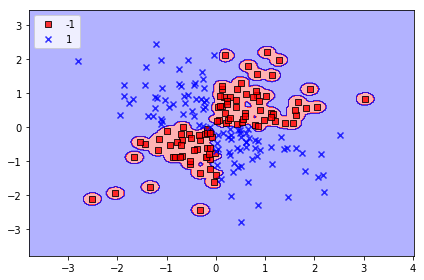

In [29]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

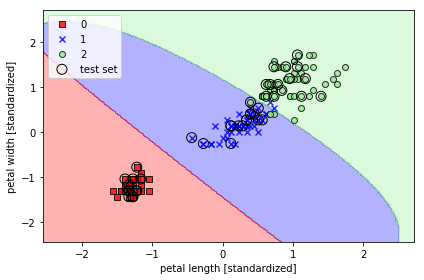

In [30]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

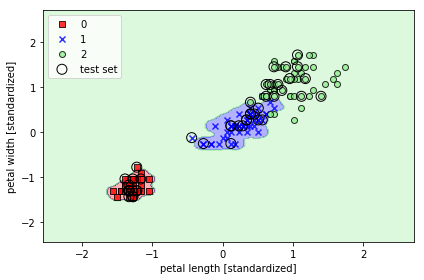

In [31]:
#パラメータを変更
#gammaを大きくすると決定境界が複雑になる （過学習っぽくなる）
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Desicion Tree

In [32]:
#ジニ不純度の関数
def gini(p):
    return p*(1-p) + (1-p)*p

#エントロピーの関数
def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2(1-p)

#分類誤差の関数
def error(p):
    return 1-np.max([p, 1-p])

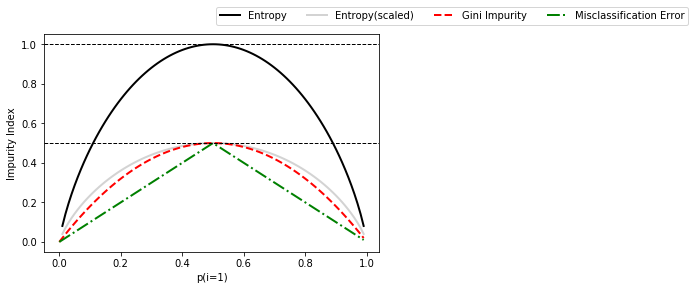

In [33]:
x=np.arange(0.0, 1.0, 0.01)
#エントロピー、分類誤差を計算
ent=[entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                                 ['Entropy', 'Entropy(scaled)', 'Gini Impurity', 'Misclassification Error'],
                                ['-', '-', '--', '-.'],
                                ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc='upper left', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim=(0, 1.1)
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()
#３つの不純度条件の比較

In [34]:
from sklearn.tree import DecisionTreeClassifier

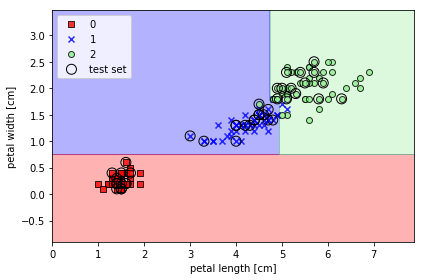

In [35]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [36]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

In [37]:
dot_data = export_graphviz(tree, filled=True, rounded=True,
                                                   class_names=['Setosa', 'Versicolor', 'Virginica'],
                                                   feature_names=['petal length', 'petal width'],
                                                  out_file=None)
graph=graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

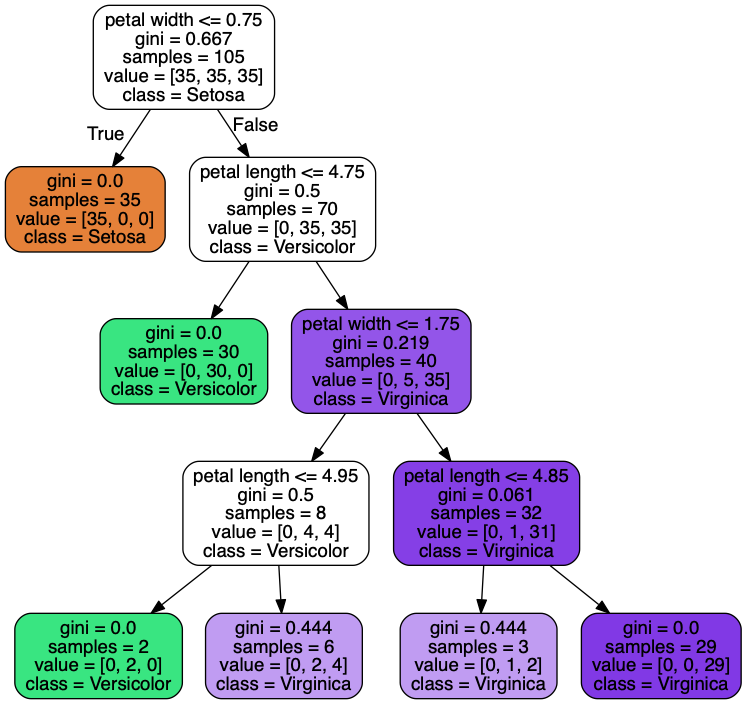

In [38]:
from IPython.display import Image
Image(filename='./tree.png')

## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


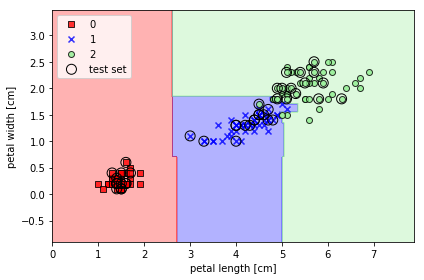

In [40]:
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## k-nearest neighbor classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier

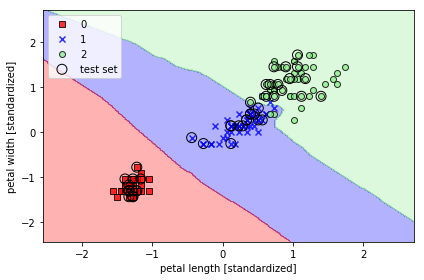

In [42]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()